In [1]:
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


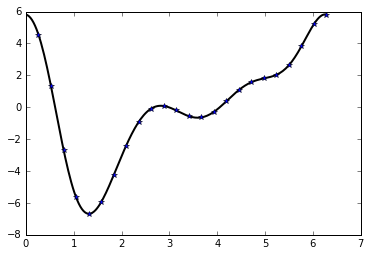

In [2]:

N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))
# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
np.array([0])  , # Because hat{f}'(k) at k = N/2 is zero.
np.arange(-N/2+1,0,1)  ))
# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))
# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -np.sin(x2)**3. +2*np.cos(x2+1)*np.exp(2*np.sin(x2+1)))
plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.savefig('spectral2_derivative.pdf')
plt.show()

# Problem 1

In [12]:
def derive():
    N=24
    x1 = (2.*np.pi/N)*np.arange(1,N+1)
    f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))
    # This array is reordered in Python to
    # accomodate the ordering inside the fft function in scipy.
    k = np.concatenate(( np.arange(0,N/2) ,
    np.array([0])  , # Because hat{f}'(k) at k = N/2 is zero.
    np.arange(-N/2+1,0,1)  ))
    # Approximates the derivative using the pseudospectral method
    f_hat = fft(f)
    fp_hat = ((1j*k)*f_hat)
    fp = np.real(ifft(fp_hat))
    
    dub_f_hat = fft(f)
    dub_fp_hat = ((-k**2)*dub_f_hat)
    dub_fp = np.real(ifft(fp_hat))
    
    plt.title("Derivative")
    plt.plot(x1,dub_fp)
    plt.show()
    plt.title("Differential Equation: .5*u' - u")
    plt.plot(x1,.5*dub_fp - fp)
    plt.show()

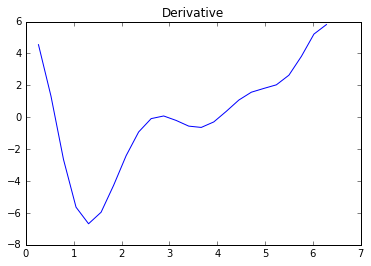

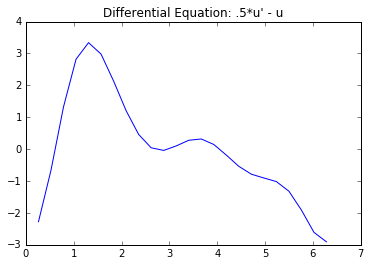

In [13]:
derive()

# Problem 2

In [5]:
def initialize_all(y0, t0, t1, n):
    """ An initialization routine for the different ODE solving
    methods in the lab. This initializes Y, T, and h. """
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size),dtype=complex).squeeze()
    else:
        Y = np.empty(n,dtype=complex)
    Y[0] = y0
    T = np.linspace(t0, t1, n)
    h = float(t1 - t0) / (n - 1)
    return Y, T, h

In [6]:
def RK4(f, y0, t0, t1, n):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y'= f(t, y) at n equispaced parameter values 
    from t0 to t with initial conditions y(t0) = y0.
    'y0' is assumed to be either a constant or a one-dimensional numpy array.
    't0' and 't1' are assumed to be constants.
    'f' is assumed to accept two arguments.
    The first is a constant giving the current value of t.
    The second is a one-dimensional numpy array of the same size as y.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the y0, t0, t1, napproximate value of y at
    the i'th value of np.linspace(t0, t, n).
    """
    Y, T, h = initialize_all(y0, t0, t1, n)
    for i in xrange(1, n):    
        K1 = f(T[i-1], Y[i-1])
        tplus = (T[i] + T[i-1]) * .5
        K2 = f(tplus, Y[i-1] + .5 * h * K1)
        K3 = f(tplus, Y[i-1] + .5 * h * K2)
        K4 = f(T[i], Y[i-1] + h * K3)
        Y[i] = Y[i-1] + (h / 6.) * (K1 + 2 * K2 + 2 * K3 + K4)
        K1 = f(T[i-1], Y[i-1])
        tplus = (T[i] + T[i-1]) * .5
        K2 = f(tplus, Y[i-1] + .5 * h * K1)
        K3 = f(tplus, Y[i-1] + .5 * h * K2)
        K4 = f(T[i], Y[i-1] + h * K3)
        Y[i] = Y[i-1] + (h / 6.) * (K1 + 2 * K2 + 2 * K3 + K4)
    return T, Y

(150, 100)


/usr/local/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


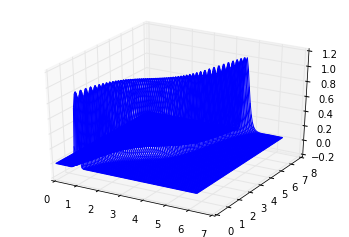

In [7]:
t_steps = 150    # Time steps    """ An initialization routine for the different ODE solving
x_steps = 100     # x steps
x_domain = np.linspace(0,2*np.pi,x_steps)


u = lambda x: np.exp(-100.*(x-1)**2)
t0 = 0
t1 = 8
y0 = u(x_domain)
t_domain = np.linspace(0,8,t_steps)




N = x_steps
k = np.concatenate(( np.arange(0,N/2) ,
np.array([0])  , # Because hat{f}'(k) at k = N/2 is zero.
np.arange(-N/2+1,0,1)  ))



c = lambda x: 0.2 + np.sin(x-1)**2
c_vals = c(x_domain)

f = lambda t,y: -c_vals*ifft(1j*k*fft(y))

T,sol = RK4(f,y0,t0,t1,t_steps)
print np.shape(sol)
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
plt.show()